# Group Assignment 

Analysis of the known SMILES

In [19]:
# Import packages 
import pandas as pd
import seaborn as sns
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
#from rdkit.Chem.Draw import IPythonConsole

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Preprocessing

In [20]:
# Read file
original_df = pd.read_csv('tested_molecules_1.csv')

# Split the column
original_df[['SMILES', 'ALDH1_inhibition']] = original_df['SMILES,"ALDH1_inhibition"'].str.split(',', expand=True)
original_df.drop('SMILES,"ALDH1_inhibition"', axis=1, inplace=True)

original_df['ALDH1_inhibition'] = original_df['ALDH1_inhibition'].str.strip('"')

all_descriptors = [desc[0] for desc in Descriptors.descList]

descriptor_data = []
for i, row in original_df.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    descriptor_values = [getattr(Descriptors, descriptor)(mol) for descriptor in all_descriptors]
    descriptor_data.append(descriptor_values)

descriptor_df = pd.DataFrame(descriptor_data, columns=all_descriptors)
original_df = pd.concat([original_df, descriptor_df], axis=1)

df = original_df.copy()

#Molecular Weight (MolWt)
#Exact and Approximate LogP (MolLogP, MolMR)
#Topological Polar Surface Area (TPSA)
#Number of H-Bond Donors and Acceptors (NumHDonors, NumHAcceptors)
#Rotatable Bonds (NumRotatableBonds)
#Number of Aromatic Rings (NumAromaticRings)
#Number of Heavy Atoms (NumHeavyAtoms)
#Number of Heteroatoms (NumHeteroatoms)
#Number of Rings (NumRings)
#Number of Chiral Centers (NumChiralCenters)
#Fraction of Sp3 Hybridized Carbons (FractionCSP3)
#Molecular Complexity Indices (MolLogS, FpDensityMorgan1, FpDensityMorgan2)

### Adding descriptors

In [21]:
# Get all available descriptors
all_descriptors = [desc[0] for desc in Descriptors.descList]

# Print all descriptors
for descriptor in all_descriptors:
    print(descriptor)

MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_VSA7

In [22]:
#df.head()  # waarom maar 5 rijen?  Pakt wel 209 PCs dus denk dat het goed gaat. 

In [23]:
df_variables = df.drop(columns=["SMILES", "ALDH1_inhibition"])
df_variables.head()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          13.083531       13.083531           0.001173       -0.683140   
1          12.170097       12.170097           0.066966       -0.066966   
2          10.905837       10.905837           0.016881       -0.016881   
3          11.562446       11.562446           0.270607       -0.454447   
4          12.108866       12.108866           0.086947       -3.251317   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.520365  463.542         434.310  463.233188                  178   
1  0.498564  378.457         360.313  378.115047                  136   
2  0.382043  477.589         444.325  477.260865                  184   
3  0.795948  330.609         317.505  328.981818                   96   
4  0.687618  419.553         402.417  419.043204                  140   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                    0  ...           0             0           0   
1                    0  ...           1             0           0   
2                    0  ...           0             0           0   
3                    0  ...           0             0           0   
4                    0  ...           0             1           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             1            0            0             0   
1                  0             0            0            0             0   
2                  0             1            0            0             0   
3                  0             0            0            0             0   
4                  0             0            1            0             1   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        0  
4                 0        0  

[5 rows x 209 columns]

### Find correlation

MaxAbsEStateIndex == MaxEStateINdex is removed 


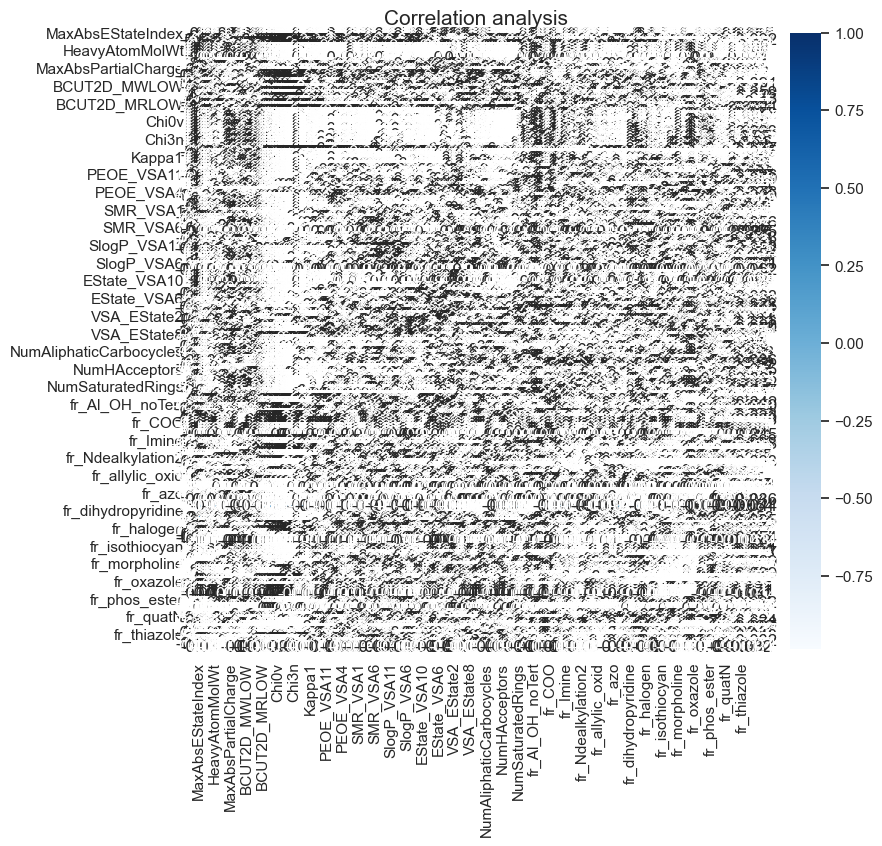

In [24]:
correlation = df_variables.corr()                            # Calculate correlation

### Te veel variabelen om er een mooi figuur van te maken
sns.set (rc = {'figure.figsize':(9, 8)})                     # Set size of figure
sns.heatmap(correlation, cmap="Blues", annot=True)           # Making heatmap
plt.title('Correlation analysis', fontsize=15);   

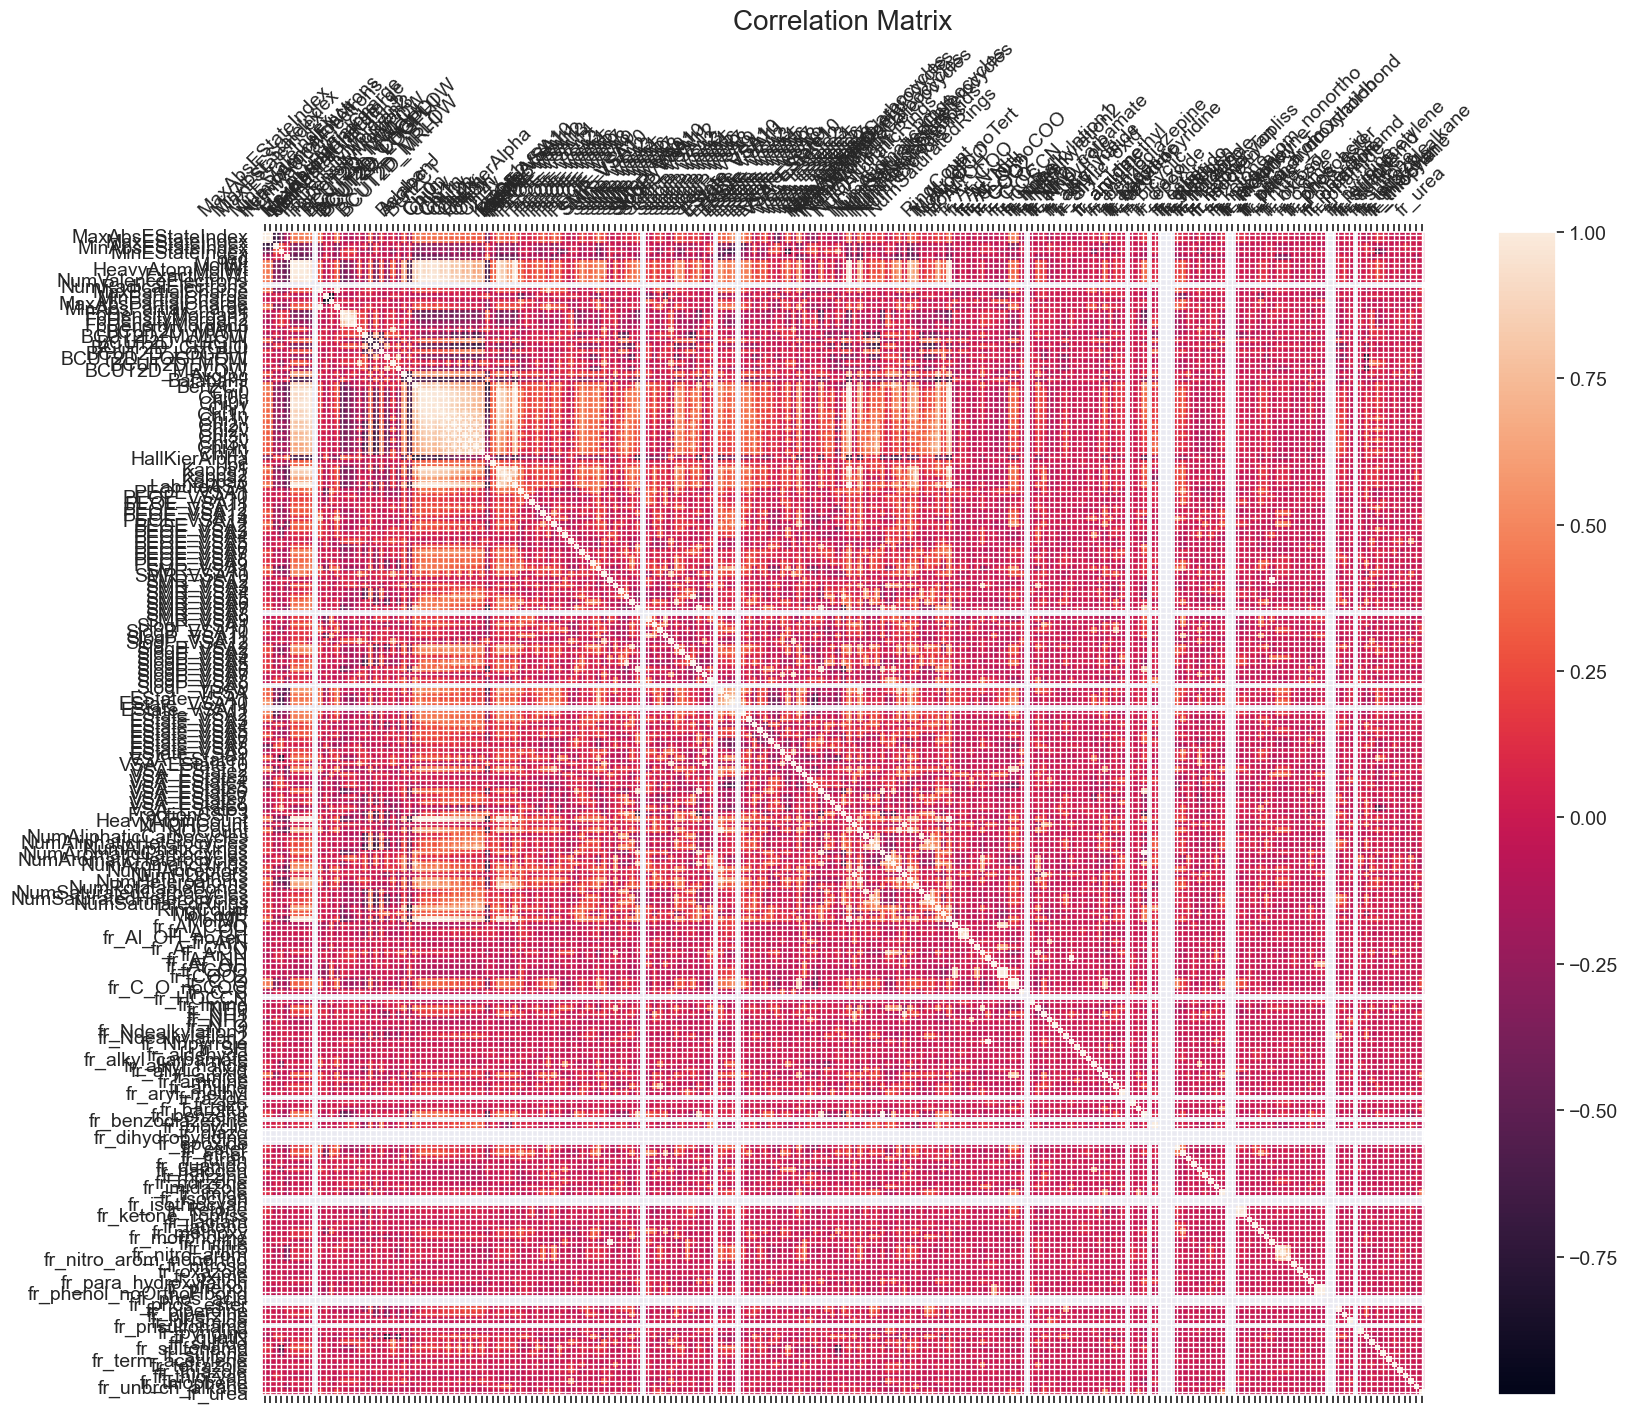

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation, fignum=f.number)          

# choose axes range
plt.xticks(range(df_variables.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_variables.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()  
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20);

In [26]:
df_variables = df_variables.drop(columns=["MaxEStateIndex"])

### Check missing values 


In [27]:
missing_values = df_variables.isna().sum().sum()     
if missing_values > 0: 
   print('Remove missing values')
else: 
   print('No missing_values')

No missing_values


### Check duplicates

In [28]:
check_duplicate = original_df.duplicated()
if check_duplicate.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("All GOOD!")

All GOOD!


## Principal Component Analysis (PCA)

In [29]:
# Scaling the data 
df_copied = df_variables.copy()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_copied)

In [30]:
# Create principal components
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca_converted = pd.DataFrame(df_pca, columns=component_names)

df_pca_converted.head()    

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.646025 -0.389914  0.493014  0.000117  0.501756 -0.215706  0.078404   
1  0.366975 -0.975693  0.411695  0.151572 -0.138522 -0.262440  0.155052   
2  1.620066 -0.567459  1.440647  0.030501  0.522393 -0.302164 -0.095787   
3 -0.990313 -0.141324  0.050116 -0.029595 -0.339489  0.439557  0.243910   
4  0.678321 -0.419331  0.373723  0.362104 -0.614475  0.683549  0.123217   

        PC8       PC9      PC10  ...         PC199         PC200  \
0 -0.367713  0.147157 -0.690747  ... -5.036604e-17  2.897842e-17   
1  0.016901 -0.057825 -0.178542  ...  5.286890e-17 -1.892952e-16   
2  0.050440  0.754593 -0.175366  ... -1.412882e-17  8.075277e-17   
3  0.366952 -0.385988  0.265850  ...  6.869799e-17 -1.519138e-18   
4  0.349261 -0.132617 -0.103291  ...  4.395326e-17 -9.685855e-18   

          PC201         PC202         PC203         PC204         PC205  \
0  2.336807e-17 -2.011547e-17 -6.592247e-17 -6.103791e-17 -2.533331e-17   
1 -2.372947e-17  3.359291e-18  1.368923e-16  7.542680e-17  1.078883e-16   
2 -5.771471e-18  1.214832e-16  7.149517e-17 -4.524760e-17  6.506454e-17   
3 -2.124905e-17 -1.466144e-17 -5.505581e-17  7.137445e-17  8.202265e-17   
4 -3.185883e-17 -1.629274e-16 -4.526151e-17 -3.585067e-17  7.183572e-17   

          PC206         PC207         PC208  
0 -1.022203e-17 -2.970958e-17  2.520848e-17  
1  1.576285e-16  1.321241e-17 -1.710721e-17  
2 -8.314716e-17  1.037444e-16 -6.611067e-17  
3  1.226337e-16 -6.066446e-17  5.858193e-17  
4 -8.230223e-18 -6.603216e-17 -4.092854e-18  

[5 rows x 208 columns]

In [31]:
# Explained variance
evr = pca.explained_variance_ratio_
print(evr*100)
    
# Cumaltive Variance
cv = np.cumsum(evr)
print(cv)                                # NEED 46 Principal components for 90% , 11 for 60% 

[1.97666683e+01 7.81805386e+00 5.94120427e+00 5.18932970e+00
 4.05711250e+00 3.62075427e+00 3.31220165e+00 2.80093934e+00
 2.53441550e+00 2.24239265e+00 1.99010377e+00 1.89860221e+00
 1.82228636e+00 1.56836180e+00 1.48017927e+00 1.43249995e+00
 1.34530702e+00 1.21524569e+00 1.18859349e+00 1.18060734e+00
 1.04264505e+00 1.02380491e+00 9.56845476e-01 9.21062938e-01
 9.03793669e-01 8.61243082e-01 8.28901342e-01 7.96447087e-01
 7.86807690e-01 7.48405719e-01 7.22566645e-01 6.81293241e-01
 6.76770717e-01 6.42536942e-01 6.29039674e-01 6.12579040e-01
 5.79120088e-01 5.42378091e-01 5.29205279e-01 5.25245831e-01
 4.85587653e-01 4.60686191e-01 4.47954103e-01 4.13493542e-01
 3.96380807e-01 3.93871581e-01 3.80938173e-01 3.70974247e-01
 3.53969112e-01 3.48733590e-01 3.29826224e-01 3.17212541e-01
 2.93103272e-01 2.89333685e-01 2.79139185e-01 2.71725176e-01
 2.56592120e-01 2.52700265e-01 2.45048528e-01 2.30238535e-01
 2.25118588e-01 2.13927382e-01 2.07205514e-01 2.00749769e-01
 1.95161686e-01 1.903447

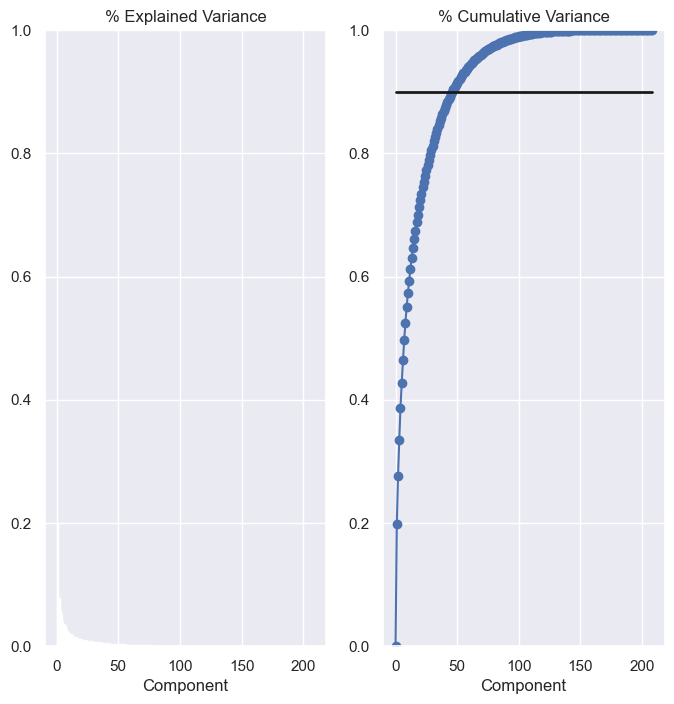

In [32]:
# Create figure
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)

# Explained variance
axs[0].bar(grid, evr)
axs[0].set(
    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
)

# Cumulative Variance
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].plot([0, n], [0.9, 0.9], color='k', linestyle='-', linewidth=2)
axs[1].set(
    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
)
        
# Set up figure
fig.set(figwidth=8, dpi=100);

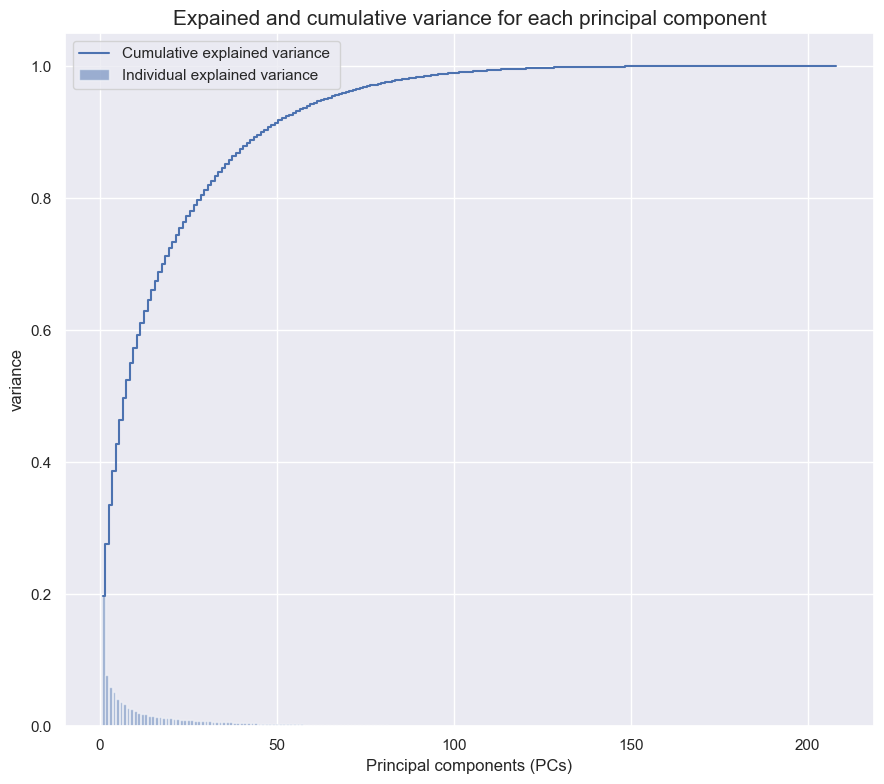

In [33]:
# Summery figure explained and cumulative variance
plt.bar(range(1,len(evr)+1), evr, alpha=0.5, align='center', label='Individual explained variance ')    # explained variance
plt.step(range(1,len(cv)+1), cv, where='mid',label='Cumulative explained variance ')       # Cumulative explained variance

plt.xlabel('Principal components (PCs)')
plt.ylabel('variance')
plt.title('Expained and cumulative variance for each principal component', fontsize=15)

plt.legend(loc='best')
plt.tight_layout()
plt.show() 

In [34]:
try:
    import matplotlib.pyplot
    print("Library is installed.")
except ImportError:
    print("Library is not installed.")

Library is installed.


In [35]:
import rdkit
print(rdkit.__version__)

2023.03.1


### Loadings

In [36]:
loadings = pd.DataFrame(
   pca.components_.T,                     # transpose the pca matrix 
   columns=component_names,               # so the columns are the principal components
   index=df_variables.columns,                      # and the rows are the original features
)
loadings      

PC1       PC2       PC3       PC4       PC5       PC6  \
MaxAbsEStateIndex  0.089380  0.041977 -0.090042  0.071418 -0.093137 -0.037507   
MinAbsEStateIndex -0.053481 -0.046370  0.058533 -0.078158  0.049849  0.027500   
MinEStateIndex    -0.073131 -0.052513  0.135607 -0.105055  0.161429 -0.288251   
qed               -0.101847  0.056526  0.062967 -0.112444 -0.051289  0.129814   
MolWt              0.182048 -0.019806 -0.006036  0.017044 -0.023338  0.036221   
...                     ...       ...       ...       ...       ...       ...   
fr_thiazole        0.001304 -0.039915  0.024185  0.039131 -0.033116  0.012750   
fr_thiocyan       -0.002500 -0.000649  0.000121 -0.001324 -0.000223  0.001475   
fr_thiophene       0.003492 -0.015993  0.055501  0.054735 -0.057199 -0.007551   
fr_unbrch_alkane   0.002889  0.007865 -0.006011  0.002566  0.015872  0.006287   
fr_urea            0.000950  0.029045 -0.021115  0.015067  0.000983 -0.052218   

                        PC7       PC8       PC9      PC10  ...         PC199  \
MaxAbsEStateIndex -0.081965 -0.033160 -0.102627  0.021034  ... -0.000000e+00   
MinAbsEStateIndex  0.057712 -0.010923  0.035602 -0.010047  ... -1.537499e-18   
MinEStateIndex     0.159521  0.063192 -0.109546  0.054561  ... -6.951511e-18   
qed               -0.071473 -0.039720 -0.175660 -0.148141  ... -4.842268e-18   
MolWt              0.037985  0.062705  0.003078  0.022852  ...  4.040687e-15   
...                     ...       ...       ...       ...  ...           ...   
fr_thiazole        0.004882  0.066048  0.021545  0.086362  ...  1.084202e-19   
fr_thiocyan        0.000232  0.000822  0.000050  0.000101  ...  1.517883e-17   
fr_thiophene       0.040643  0.109732 -0.044975  0.034819  ... -9.812030e-18   
fr_unbrch_alkane   0.031418  0.016526  0.022605 -0.032431  ...  1.498910e-17   
fr_urea            0.032519 -0.058405 -0.060266 -0.042905  ...  4.119968e-18   

                          PC200         PC201         PC202         PC203  \
MaxAbsEStateIndex  0.000000e+00  0.000000e+00  0.000000e+00 -0.000000e+00   
MinAbsEStateIndex  6.228261e-18 -1.376557e-18  2.969124e-18  8.216732e-19   
MinEStateIndex    -1.798182e-17  1.104996e-17 -1.180230e-17 -9.959136e-18   
qed               -2.343230e-18  3.503621e-18 -8.623322e-18  9.140543e-19   
MolWt              1.714446e-15  8.331475e-16  4.577987e-15 -9.569052e-15   
...                         ...           ...           ...           ...   
fr_thiazole       -3.740497e-18  8.456777e-18 -1.279359e-17  1.816039e-18   
fr_thiocyan       -3.609038e-17  1.409463e-17  1.886512e-17 -9.757820e-18   
fr_thiophene      -3.816392e-17  2.938188e-17 -3.079134e-17 -1.669671e-17   
fr_unbrch_alkane   7.772374e-18 -8.334804e-19 -5.195700e-18  2.488922e-17   
fr_urea           -2.233456e-17 -1.946143e-17 -2.721347e-17 -1.750987e-17   

                          PC204         PC205         PC206         PC207  \
MaxAbsEStateIndex -0.000000e+00  0.000000e+00  0.000000e+00 -0.000000e+00   
MinAbsEStateIndex -6.254159e-19  6.005045e-20 -5.699073e-19  1.387599e-19   
MinEStateIndex    -4.742065e-19 -2.742791e-19  3.526197e-18 -2.518108e-19   
qed                1.717424e-18  3.372573e-19  3.621566e-19 -2.074591e-19   
MolWt             -3.270978e-16 -3.912989e-17  3.059351e-18  3.018363e-17   
...                         ...           ...           ...           ...   
fr_thiazole        1.660185e-18 -1.063297e-18  2.784155e-18  6.522040e-19   
fr_thiocyan        1.599198e-18  1.939502e-19  4.582200e-19  4.631768e-20   
fr_thiophene       1.871096e-18 -1.899077e-18  7.242250e-18  1.341685e-18   
fr_unbrch_alkane   4.848417e-18  8.918319e-19  1.647814e-18 -1.282971e-19   
fr_urea           -1.292572e-17 -3.661635e-18  1.383443e-18 -3.817331e-19   

                          PC208  
MaxAbsEStateIndex -0.000000e+00  
MinAbsEStateIndex -1.104802e-16  
MinEStateIndex    -3.462848e-17  
qed                4.149431e-17  
MolWt             -8.357132e-14  
...                         ...  
fr

In [37]:
def plot_loadings(PC_1, PC_2):
    labels = loadings.index
    sns.set_style('white')
    sns.scatterplot(data=loadings, x=PC_1, y=PC_2, hue=labels, palette = 'Paired')

    plt.axhline(y=0, color='gray', linestyle='dotted')    
    plt.axvline(x=0, color='gray', linestyle='dotted')
    plt.axline((-0.2, -0.2), slope = 1,color ='r', linestyle = 'dotted')

    plt.legend(ncol =5, title = 'Variables', loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, 'Loadings principal components 1 and 2')

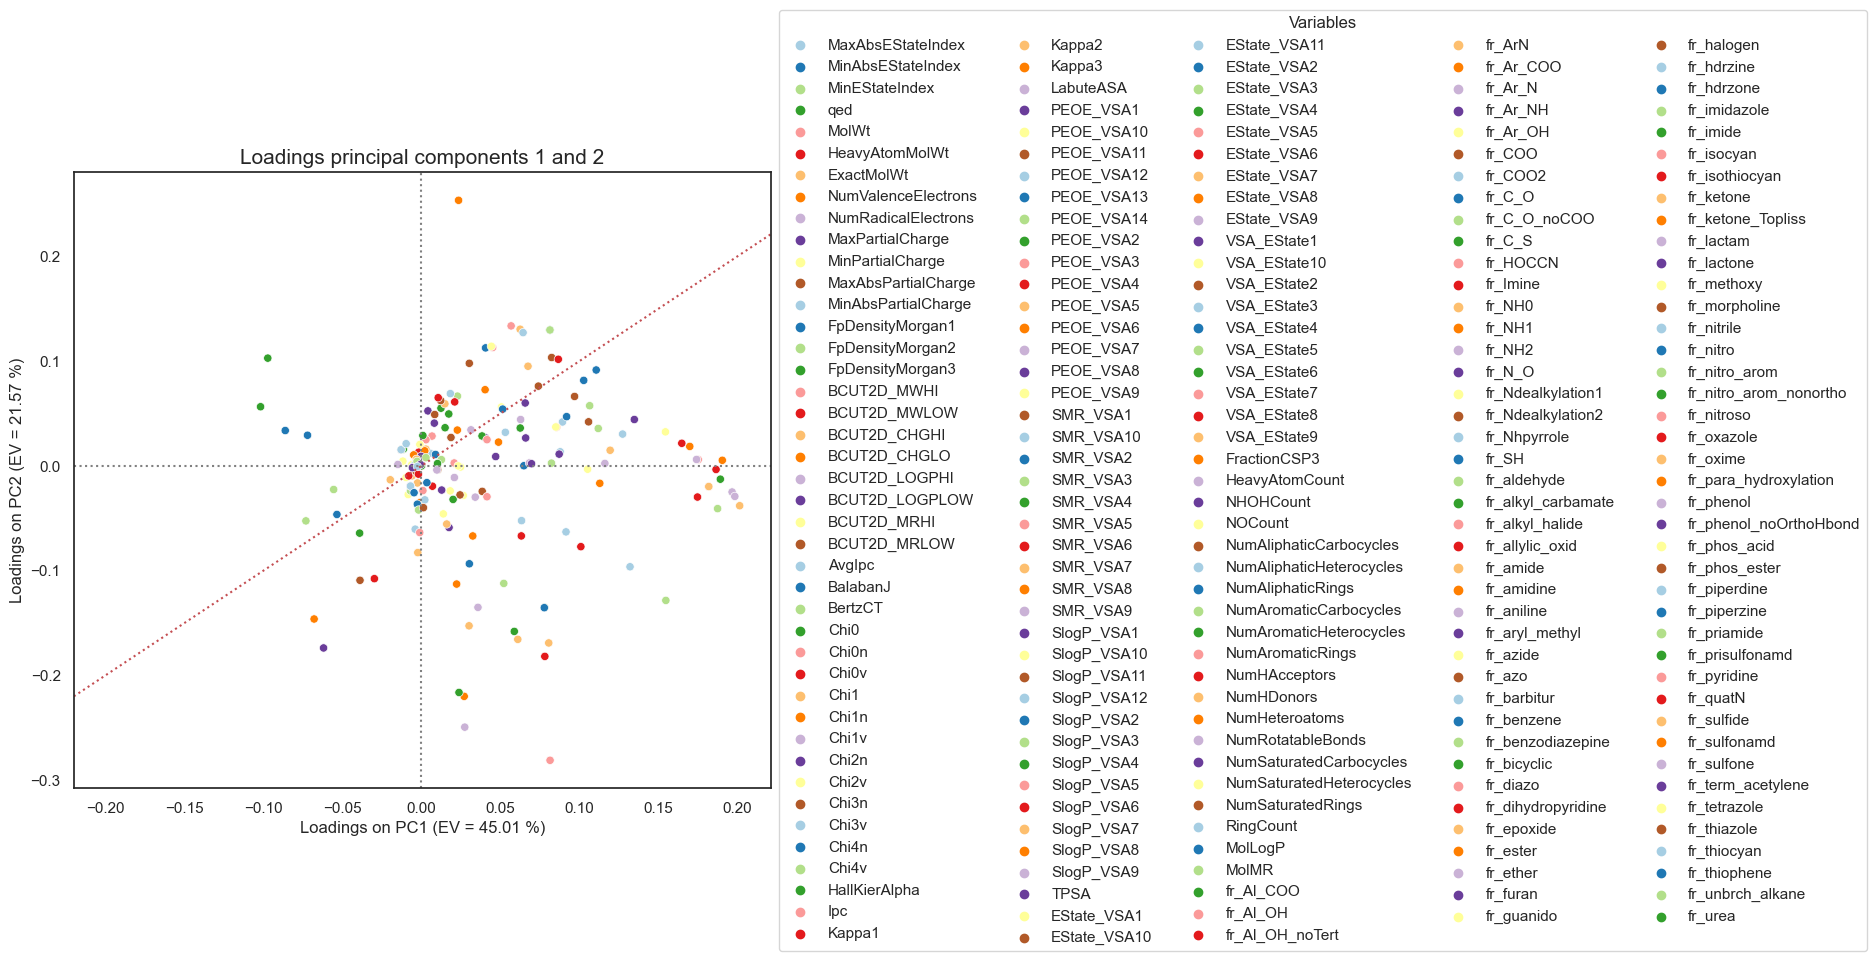

In [38]:
plot_loadings(PC_1 ='PC1', PC_2= 'PC2')               # IS ZO NIETS ZICHTBAAR< Worden te veel variabelen meegenomen. 

plt.xlabel('Loadings on PC1 (EV = 45.01 %)')
plt.ylabel('Loadings on PC2 (EV = 21.57 %)')
plt.title('Loadings principal components 1 and 2', fontsize = 15)

### Score plots 

In [39]:
def plot_scores(label,PC_1, PC_2):
    labels = original_df[label]
    sns.set_style('white')
    sns.scatterplot(x=df_pca[:, PC_1], y=df_pca[:, PC_2], hue=labels, palette= 'bright')

    plt.axhline(y=0, color='gray', linestyle='dotted')    
    plt.axvline(x=0, color='gray', linestyle='dotted')

    plt.legend(loc= 'best', ncol =2, title = label)

In [40]:
print(df_pca)

[[ 1.64602466e+00 -3.89914370e-01  4.93013836e-01 ... -1.02220308e-17
  -2.97095806e-17  2.52084782e-17]
 [ 3.66975004e-01 -9.75693062e-01  4.11695023e-01 ...  1.57628491e-16
   1.32124087e-17 -1.71072057e-17]
 [ 1.62006598e+00 -5.67458943e-01  1.44064703e+00 ... -8.31471607e-17
   1.03744407e-16 -6.61106742e-17]
 ...
 [-1.52240305e+00 -3.67771235e-01 -3.01554848e-02 ... -3.51856117e-18
   1.49456310e-17  9.71763484e-18]
 [ 5.55646899e-01 -4.07568975e-01  6.19414029e-01 ... -1.38244074e-17
   2.97701618e-17 -1.86696625e-17]
 [ 2.57355720e-01 -1.18393160e+00  5.19619933e-01 ...  1.10978952e-17
  -2.01248302e-17 -9.64929786e-18]]


Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

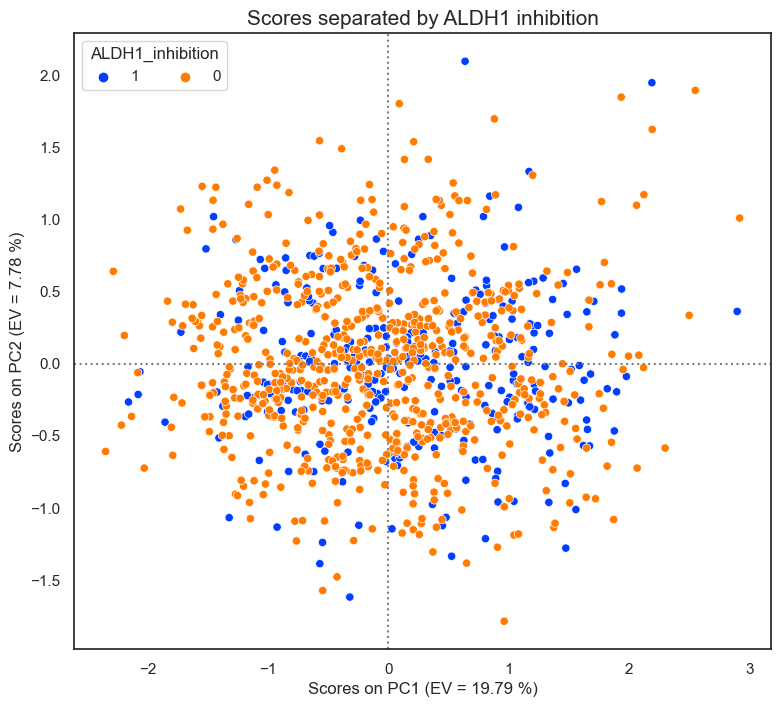

In [41]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 0 , PC_2 = 1)

plt.xlabel('Scores on PC1 (EV = 19.79 %)')
plt.ylabel('Scores on PC2 (EV = 7.78 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

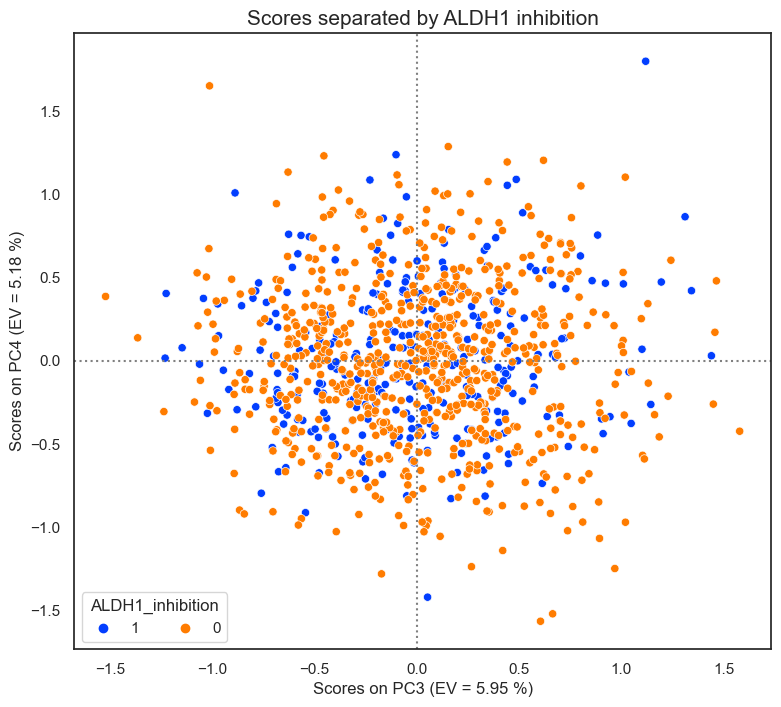

In [42]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 2 , PC_2 = 3)

plt.xlabel('Scores on PC3 (EV = 5.95 %)')
plt.ylabel('Scores on PC4 (EV = 5.18 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

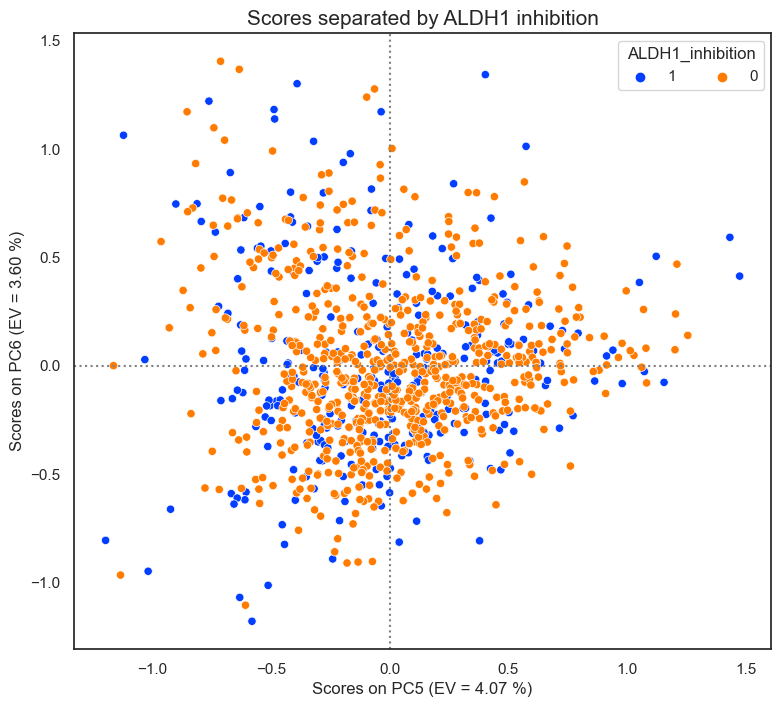

In [43]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 4 , PC_2 = 5)

plt.xlabel('Scores on PC5 (EV = 4.07 %)')
plt.ylabel('Scores on PC6 (EV = 3.60 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

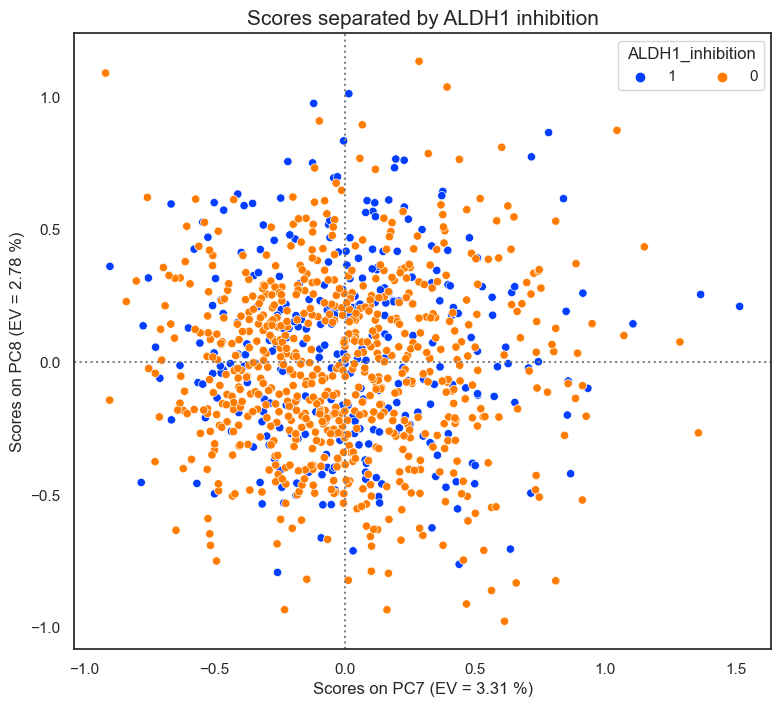

In [44]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 6 , PC_2 = 7)

plt.xlabel('Scores on PC7 (EV = 3.31 %)')
plt.ylabel('Scores on PC8 (EV = 2.78 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

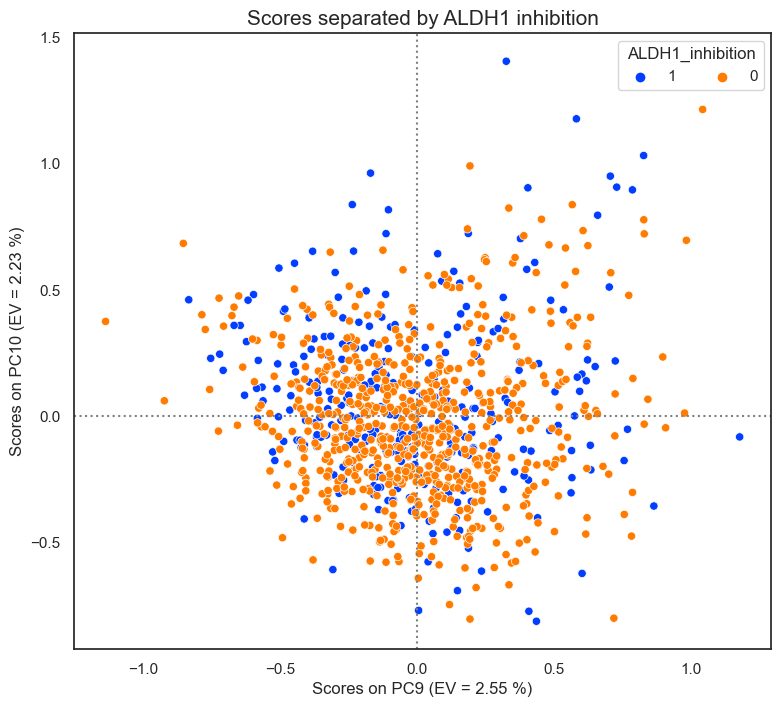

In [45]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 8 , PC_2 = 9)

plt.xlabel('Scores on PC9 (EV = 2.55 %)')
plt.ylabel('Scores on PC10 (EV = 2.23 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

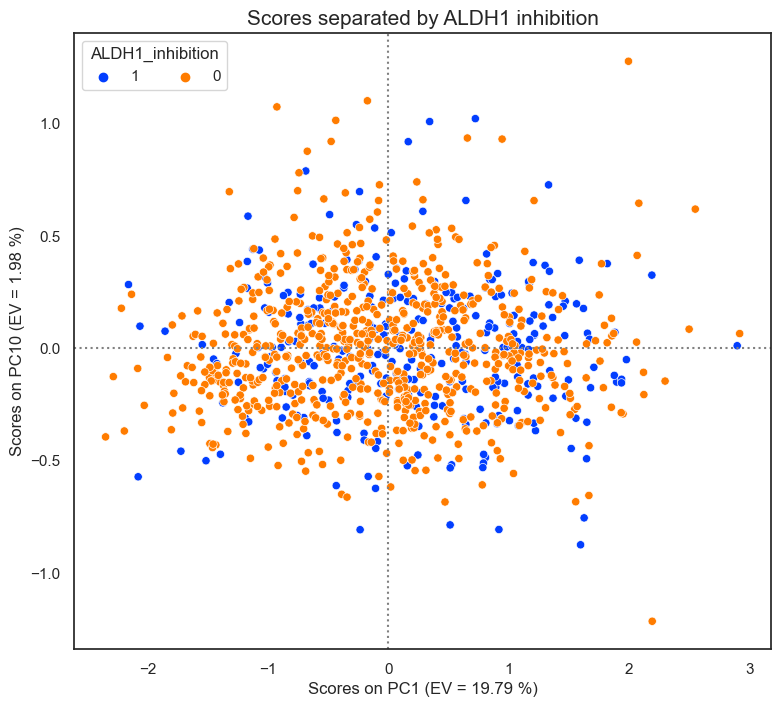

In [46]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 0 , PC_2 = 10)

plt.xlabel('Scores on PC1 (EV = 19.79 %)')
plt.ylabel('Scores on PC10 (EV = 1.98 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)